### Importando as bibliotecas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
sns.set_palette("pastel")

### Adicionandos os path dos dados

In [1]:
train_path = '../../data/raw/train.csv'
test_path = '../../data/raw/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

### Verificando os 2 datasets

#### Significado das colunas

Tradução para o português:

- **Customer ID**: Um identificador único para cada cliente

- **Surname**: O sobrenome ou último nome do cliente

- **Credit Score**: Um valor numérico representando o score de crédito do cliente

- **Geography**: O país onde o cliente reside (França, Espanha ou Alemanha)

- **Gender**: O gênero do cliente (Masculino ou Feminino)

- **Age**: A idade do cliente

- **Tenure**: O número de anos que o cliente está no banco

- **Balance**: O saldo da conta do cliente

- **NumOfProducts**: O número de produtos bancários que o cliente utiliza (por exemplo, conta poupança, cartão de crédito)

- **HasCrCard**: Se o cliente possui um cartão de crédito (1 = sim, 0 = não)

- **IsActiveMember**: Se o cliente é um membro ativo (1 = sim, 0 = não)

- **EstimatedSalary**: O salário estimado do cliente

- **Exited**: Se o cliente deixou o banco (1 = sim, 0 = não)

In [2]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


- A coluna `Exited` é nossa variável target ( **y** )

- Precisamos normalizar os dados, pois, estão em escalas diferentes e isso interfere nos desempenho dos nossos modelos

- Primeiro vamos analisar os dados usando o ``ydata-profile``

### Análise inicial

- Gerando o relatório

In [4]:
# Gerar o relatório de perfilamento
profile = ProfileReport(train_df, title='Relatório', explorative=True)

# Para exibir o relatório em um notebook Jupyter
profile.to_notebook_iframe()

#### Salvando o relatório como um arquivo HTML

In [5]:
# profile.to_file("../../report/relatorio.html")

### Separando as features e target

In [6]:
drop_cols = ['Exited', 'id', 'CustomerId', 'Surname']

features = train_df.drop(drop_cols, axis=1)
target = train_df['Exited']

# Verificando as dimensões dos dados
print('Dimensões das features:', features.shape)
print('Dimensões do target:', target.shape)

Dimensões das features: (165034, 10)
Dimensões do target: (165034,)


In [7]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


#### Verficando a taxa de churn do banco

- Se o cliente deixou o banco **(0 = não e 1 = sim )**

In [8]:
taxa = target.value_counts()
total = taxa.sum()

not_churn = taxa.get(0)
churn = taxa.get(1)
porcentagem = (churn / total) * 100

print('Número de clientes que não saíram (0):', not_churn)
print('Número de clientes que saíram (1):', churn)
print(f'Porcentagem de clientes que saíram: {porcentagem:.2f} %')

Número de clientes que não saíram (0): 130113
Número de clientes que saíram (1): 34921
Porcentagem de clientes que saíram: 21.16 %


- Realizando a visualização gráfica

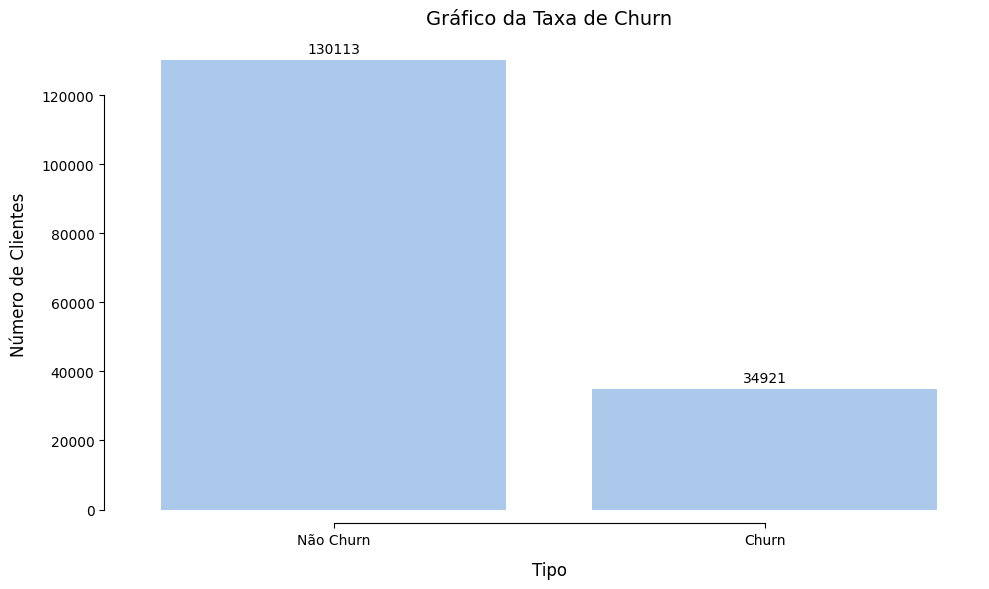

In [9]:
# Preparar os dados para o gráfico
data = {
    'Tipo': ['Não Churn', 'Churn'],
    'Frequência': [not_churn, churn],
}

df = pd.DataFrame(data)

# Criar o gráfico
f, ax = plt.subplots(figsize=(10, 6))
bar_plot = sns.barplot(x='Tipo', y='Frequência', data=df, ax=ax)

# Adicionar rótulos com porcentagens
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2i', padding=3)

# Títulos e rótulos
ax.set_title('Gráfico da Taxa de Churn', fontsize=14, pad=10)
ax.set_xlabel('Tipo', fontsize=12, labelpad=10)
ax.set_ylabel('Número de Clientes', fontsize=12, labelpad=10)

# Ajustar o layout
sns.despine(offset=10, trim=True) 
plt.tight_layout()
plt.show()

#### Churn em Bancos

Bancos Tradicionais:

- Estados Unidos: Estudos indicam que o churn anual para bancos tradicionais nos EUA gira em torno de 15-20%.
- Europa: O churn pode ser um pouco menor, variando entre 10-15% ao ano.
- América Latina: Regiões como América Latina podem ter churn mais alto devido à instabilidade econômica, podendo variar entre 20-25% ao ano.

Bancos Digitais:

- Globalmente: Bancos digitais frequentemente apresentam churn mais alto do que bancos tradicionais, variando entre 20-30% ao ano.

Desta forma, podemos categorizar essa taxa de churn como **normal**.

### Verificação

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.6+ MB


In [11]:
features.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
features.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.0,165034.00
mean,656.45,38.13,5.02,55478.09,1.55,0.75,0.5,112574.82
std,80.10,8.87,2.81,62817.66,0.55,0.43,0.5,50292.87
min,350.00,18.00,0.00,0.00,1.00,0.00,0.0,11.58
25%,597.00,32.00,3.00,0.00,1.00,1.00,0.0,74637.57
50%,659.00,37.00,5.00,0.00,2.00,1.00,0.0,117948.00
75%,710.00,42.00,7.00,119939.52,2.00,1.00,1.0,155152.47
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.0,199992.48


Devido às discrepâncias nas escalas das variáveis, devemos realizar um processo de normalização e padronização para garantir que o resultado do modelo não seja afetado.

### Visualização Gráfica

- Realizando a visualização gráfica usando Boxplots

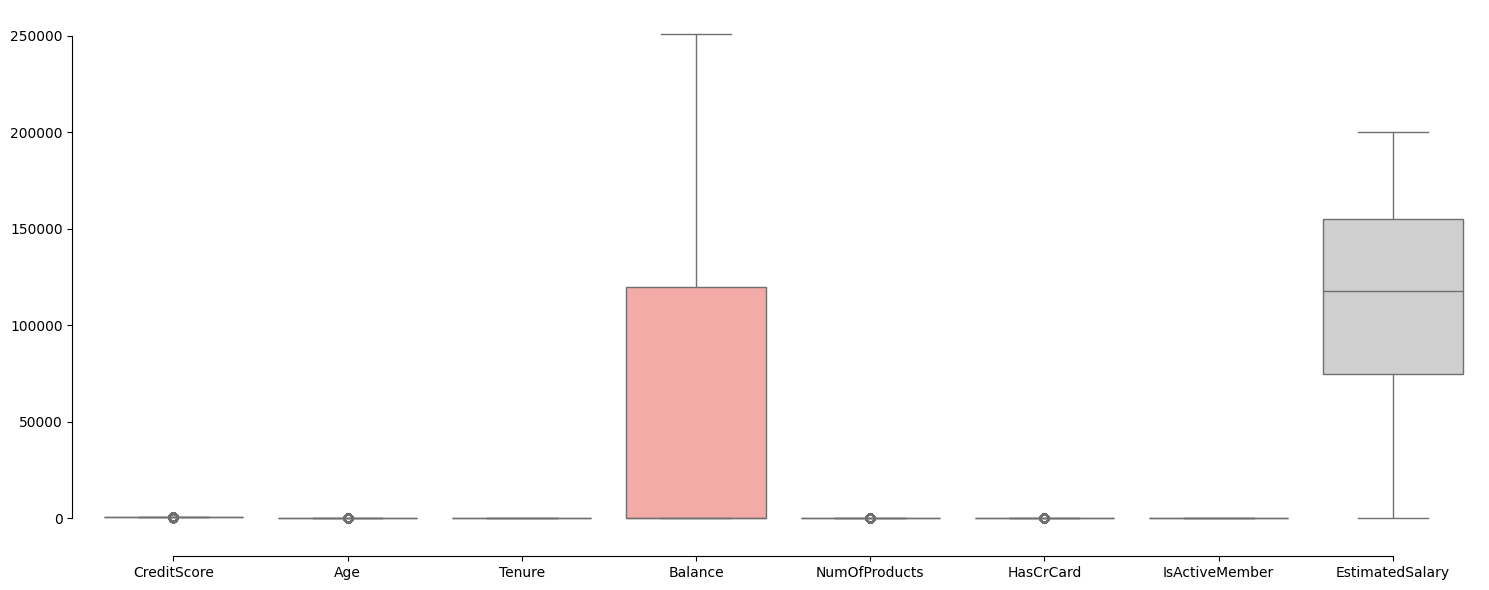

In [13]:
f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=features,  ax=ax)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

- Visualmente podemos ver com mais facilidade a diferença nas escalas.

- Devemos transformar as colunas de texto (strings) em númericas, antes da normalização dos dados.

### Aplicando o OneHotEncoder

- Tratando as colunas `Gender` e `Geography`

In [14]:
categorical_cols = ['Geography', 'Gender']

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore', dtype='int64')

# Aplicando o OneHotEncoder e transformando os dados
encoded_features = encoder.fit_transform(features[categorical_cols])

# Criando um DataFrame das colunas codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,0,1,1
...,...,...,...,...
165029,0,0,1,0
165030,1,0,0,1
165031,1,0,0,1
165032,0,0,1,0


Leitura dos valores: 
- 0 = Não 
- 1 = Sim

In [15]:
features = pd.concat([features, encoded_df], axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,1
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,1
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,1
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,1
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,1,0,0,1
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,1,0,0,1
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1,0


- Tudo parece estar correto, podemos apagar as colunas `Geography` e `Gender`

In [16]:
features = features.drop(categorical_cols, axis=1)

- As novas colunas não seguem o mesmo padrão das anteriores; portanto, vamos formatar as variáveis para que tenham a mesma sintaxe.

In [17]:
features.columns = features.columns.str.strip().str.replace('_', '')

In [18]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GeographyFrance,GeographyGermany,GeographySpain,GenderMale
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,1,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,1,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1,0


### Correlação

- Checando a correlação antes da normalização, para verficiar se existem colunas altamento relacionadas

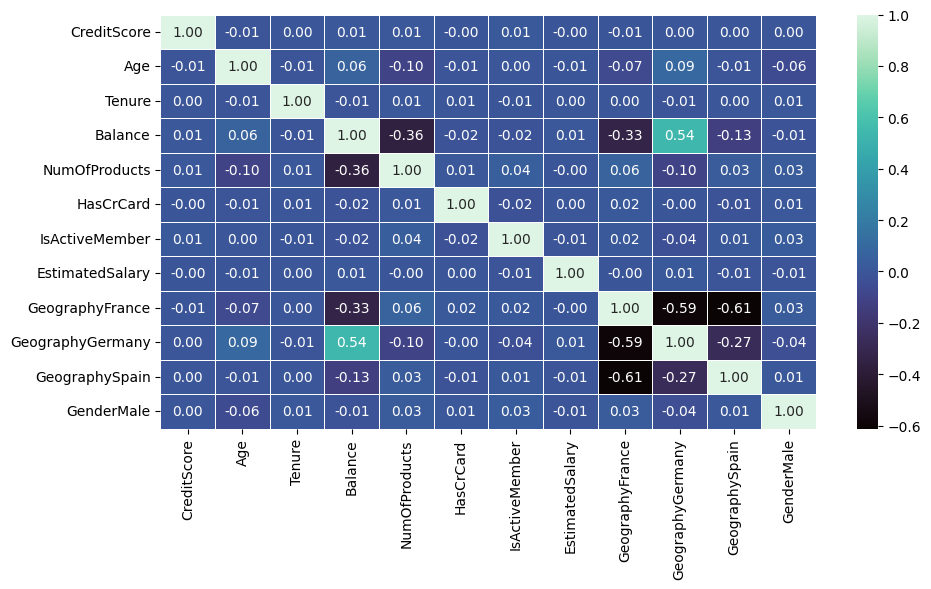

In [19]:
f_corr = features.corr()
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(f_corr, annot=True, fmt=".2f", linewidths=0.5, ax=ax, cmap='mako')
plt.tight_layout()  
plt.show()

1. Podemos ver que os Clientes da Alemanha tem uma maior correlação com Balance, ou seja com o saldo da conta

2. Os países tem uma alta correleção negativa, o que é esperado, pois, são países diferentes

3. O NumOfProducts tem uma certa correlação negativa com Balance

Bom no geral, nenhuma coluna é parecida com a outra

### Extraindo mais insights usando a árvore de decisão

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Convertendo os valores binários de target para nomes de classes
class_names = ['Não Churn', 'Churn'] 

# Instanciando o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=9)
clf.fit(features, target)   

DecisionTreeClassifier(random_state=9)

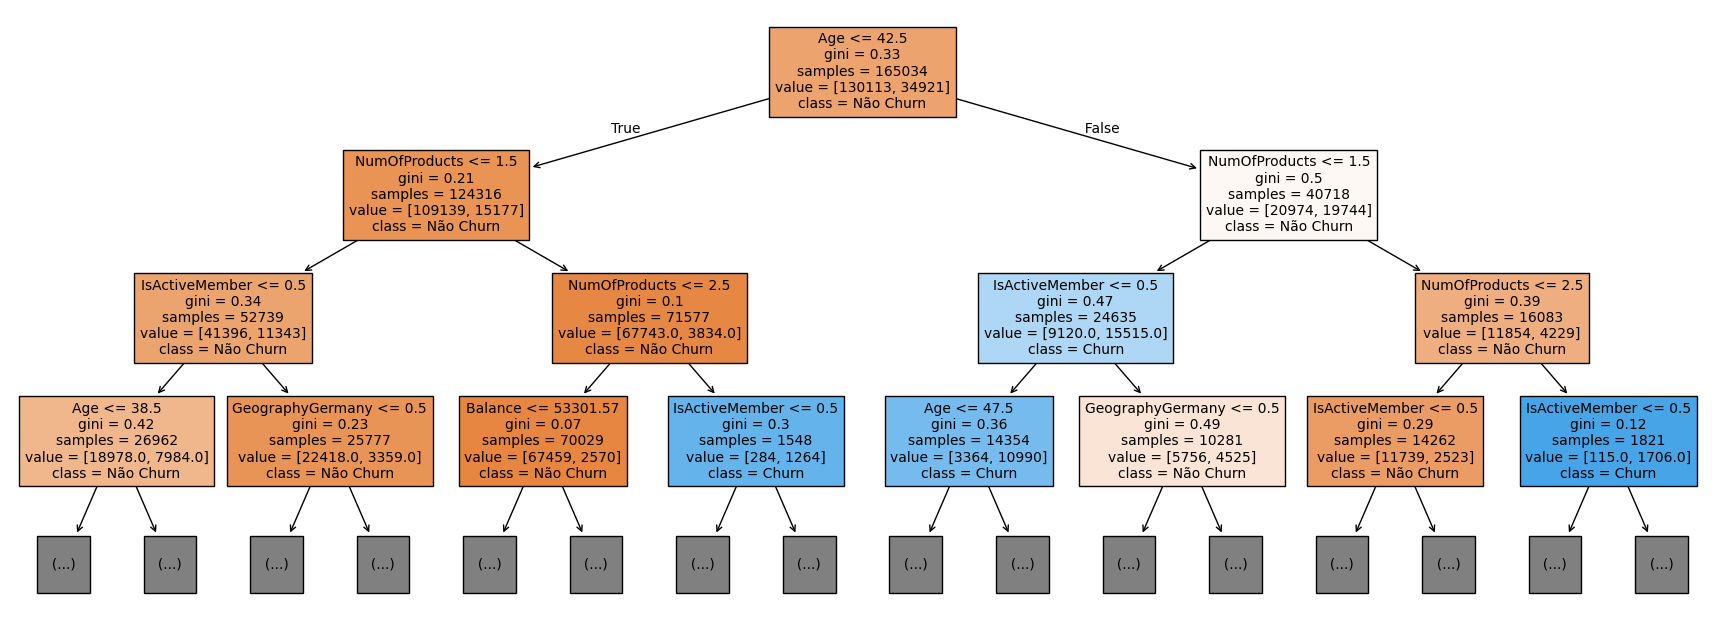

In [21]:
plt.figure(figsize=(22, 8))
plot_tree(clf, filled=True, feature_names=features.columns, class_names=class_names, max_depth=3, fontsize=10, precision=2)
plt.show()

1. Podemos ver que as colunas `Age` e `NumOfProducts` (**serviços bancários**), influênciam no churn.

2. Outra coluna que aparentemente tem um peso maior é `IsActiveMember`

### Normalização e Padronização

Usaremos o RobustScaler para fazer a normalização das colunas `Balance`, `EstimatedSalary`, `CreditScore` e `Age`

In [22]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(features[['Balance', 'EstimatedSalary', 'CreditScore', 'Age']])
features[['Balance', 'EstimatedSalary', 'CreditScore', 'Age']] = transformer.transform(features[['Balance', 'EstimatedSalary', 'CreditScore', 'Age']])

In [23]:
features.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GeographyFrance,GeographyGermany,GeographySpain,GenderMale
105444,0.495575,0.3,2,1.191528,2,1.0,1.0,-1.123251,0,1,0,0
135593,-0.973451,-0.2,9,0.000000,2,0.0,0.0,-1.076177,1,0,0,0
30159,0.168142,3.4,2,0.782031,2,1.0,1.0,0.327181,0,0,1,1


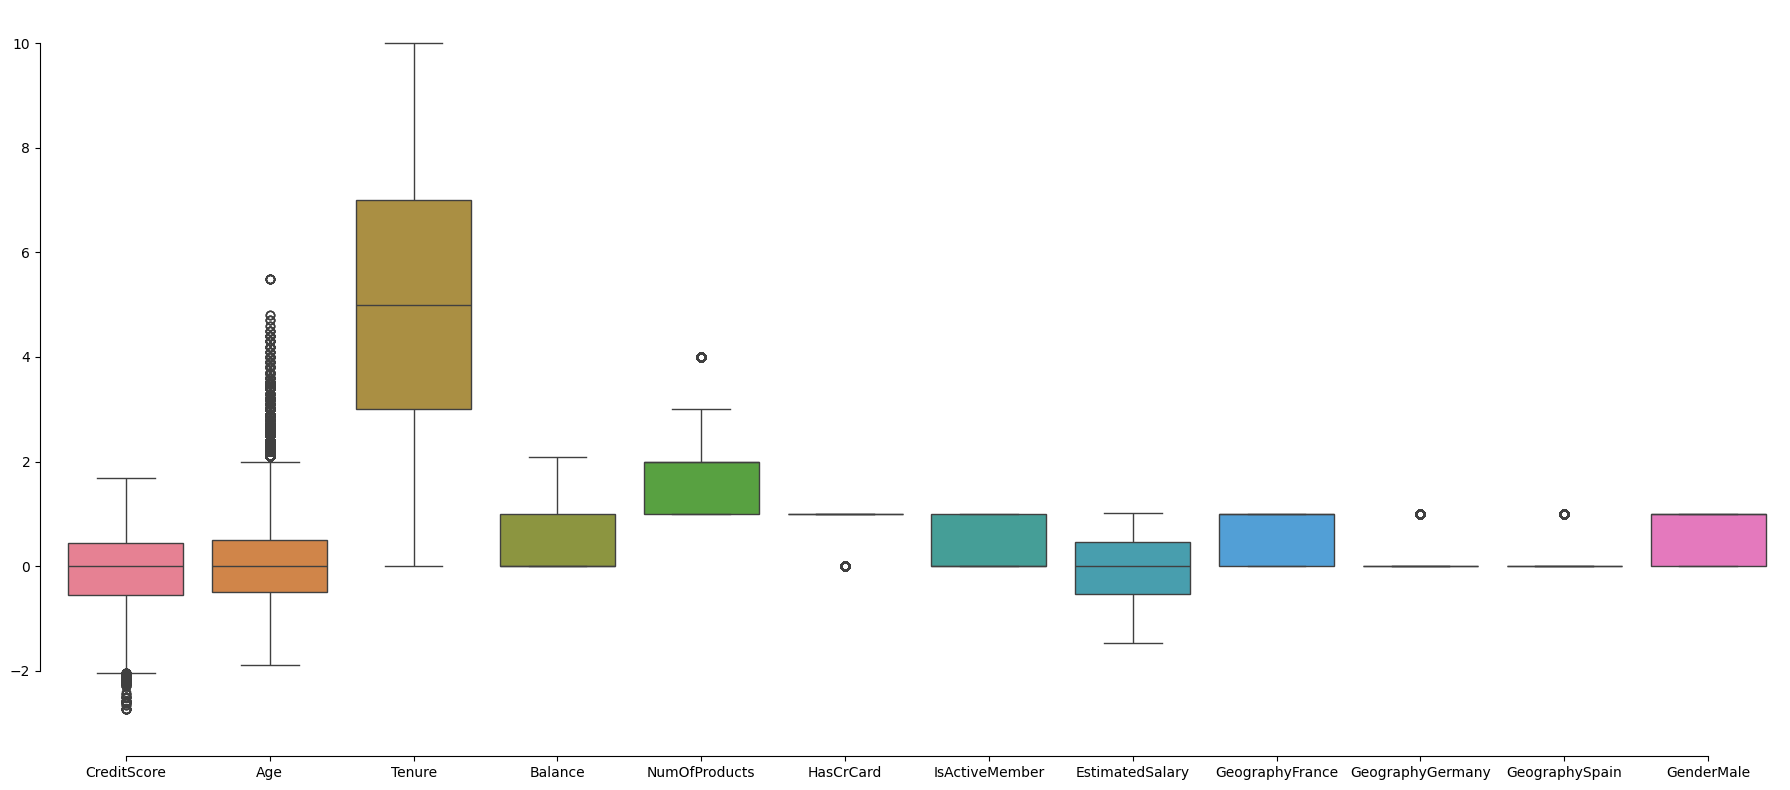

In [24]:
f, ax = plt.subplots(figsize=(18, 8))

sns.boxplot(data=features,  ax=ax)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

- Agora temos um Boxplot com mais informações úteis, e podemos visualizar melhor a distribuição dos valores

1. Temos muitos outliers para `Age` e `CreditScore`

2. A coluna `Ternure` está bem balanceada

3. As demais colunas seguem os mesmo padrão praticamente

- Visão estatística do dataframe

In [25]:
features.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GeographyFrance,GeographyGermany,GeographySpain,GenderMale
count,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.0,165034.00,165034.00,165034.00,165034.00,165034.00
mean,-0.02,0.11,5.02,0.46,1.55,0.75,0.5,-0.07,0.57,0.21,0.22,0.56
std,0.71,0.89,2.81,0.52,0.55,0.43,0.5,0.62,0.49,0.41,0.41,0.50
min,-2.73,-1.90,0.00,0.00,1.00,0.00,0.0,-1.46,0.00,0.00,0.00,0.00
25%,-0.55,-0.50,3.00,0.00,1.00,1.00,0.0,-0.54,0.00,0.00,0.00,0.00
50%,0.00,0.00,5.00,0.00,2.00,1.00,0.0,0.00,1.00,0.00,0.00,1.00
75%,0.45,0.50,7.00,1.00,2.00,1.00,1.0,0.46,1.00,0.00,0.00,1.00
max,1.69,5.50,10.00,2.09,4.00,1.00,1.0,1.02,1.00,1.00,1.00,1.00


### Feature Engineering

- Criando uma variável para representar o cliente ideal, que deve se encaixar nas três categorias indicadas:

1. Ser um membro ativo

2. Ter cartão de crédito

3. Usar mais de 1 serviço bancário

In [62]:
features['OptimalClient'] = (features['IsActiveMember'] == 1) & (features['HasCrCard'] == 1) & (features['NumOfProducts'] > 1)

- Criando a nova coluna para o cliente ideal 

In [63]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GeographyFrance,GeographyGermany,GeographySpain,GenderMale,OptimalClient
0,0.079646,-0.4,3,0.000000,2,1.0,0.0,0.788698,1,0,0,1,False
1,-0.283186,-0.4,1,0.000000,2,1.0,1.0,-0.850085,1,0,0,1,True
2,0.168142,0.3,10,0.000000,2,1.0,0.0,0.831134,1,0,0,1,False
3,-0.690265,-0.3,2,1.241313,1,1.0,1.0,-0.414670,1,0,0,1,False
4,0.504425,-0.4,5,0.000000,2,1.0,1.0,-1.277766,0,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.070796,-0.4,2,0.000000,1,1.0,1.0,0.172474,0,0,1,0,False
165030,1.176991,-0.2,3,0.000000,1,0.0,0.0,0.172471,1,0,0,1,False
165031,-0.831858,-0.6,5,0.000000,1,1.0,1.0,0.117762,1,0,0,1,False
165032,-0.929204,-0.7,7,1.346787,1,0.0,1.0,-0.580948,0,0,1,0,False


In [67]:
ideal = features['OptimalClient'].sum()
print(f"Total de cliente ideais: {ideal}")

Total de cliente ideais: 34598


- Aplicando o encoder na coluna `OptimalClient`

In [79]:
optimal = encoder.fit_transform(features[['OptimalClient']])
opt_df = pd.DataFrame(optimal, columns=['OptimalClient'])
opt_df

,OptimalClient
0,0
1,1
2,0
3,0
4,1
...,...
165029,0
165030,0
165031,0
165032,0


- Excluindo a coluna antes de concatenar os dataframes

In [81]:
features = features.drop(columns='OptimalClient', axis=1)

- Concatenando a coluna após o encoder

In [82]:
features = pd.concat([features, opt_df], axis=1)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GeographyFrance,GeographyGermany,GeographySpain,GenderMale,OptimalClient
0,0.079646,-0.4,3,0.000000,2,1.0,0.0,0.788698,1,0,0,1,0
1,-0.283186,-0.4,1,0.000000,2,1.0,1.0,-0.850085,1,0,0,1,1
2,0.168142,0.3,10,0.000000,2,1.0,0.0,0.831134,1,0,0,1,0
3,-0.690265,-0.3,2,1.241313,1,1.0,1.0,-0.414670,1,0,0,1,0
4,0.504425,-0.4,5,0.000000,2,1.0,1.0,-1.277766,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.070796,-0.4,2,0.000000,1,1.0,1.0,0.172474,0,0,1,0,0
165030,1.176991,-0.2,3,0.000000,1,0.0,0.0,0.172471,1,0,0,1,0
165031,-0.831858,-0.6,5,0.000000,1,1.0,1.0,0.117762,1,0,0,1,0
165032,-0.929204,-0.7,7,1.346787,1,0.0,1.0,-0.580948,0,0,1,0,0


- Agora nossos dados estão prontos para treinarmos modelos de machine learning

- Todavia, devemos replicar tudo no nosso dataset de validação, antes de partirmos para o ML.


### DataFrame de Validação

- Aplicaremos todos os mesmo tratamentos no dataset de validação